In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.getcwd()
os.chdir('drive')
os.chdir('MyDrive')
os.chdir('Research Project')
os.chdir('Complaints')

Mounted at /content/drive


In [2]:
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
import os
current_path = os.getcwd()

In [3]:
df = pd.read_csv("complaints.csv")
df

,Unnamed: 0,Product,Consumer complaint narrative,label,Words Per Tweet
0,1353571,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...,2,70
1,2130863,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...,2,84
2,2201555,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I...",2,147
3,1280380,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...,2,80
4,1896136,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...,2,151
...,...,...,...,...,...
14995,2903909,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...,5,265
14996,2873541,Student loan,Defaulted on my loans from the original compan...,5,73
14997,1139054,Student loan,"On XX/XX/2019, I learned that my last 3 studen...",5,345
14998,1271284,Student loan,I initially had my student loans with XXXX XXX...,5,262


In [ ]:
new_df = df.dropna(subset = ["Consumer complaint narrative"], inplace=True)

In [ ]:
counts = df["Product"].value_counts()

In [ ]:
segmented_dfs = []
for i in counts.keys()[:6]:
    segmented_dfs.append(df.loc[df["Product"]==i])

In [ ]:
counts

Credit reporting, credit repair services, or other personal consumer reports    746147
Debt collection                                                                 216088
Mortgage                                                                        107379
Credit card or prepaid card                                                     102326
Checking or savings account                                                      73896
Student loan                                                                     35576
Money transfer, virtual currency, or money service                               32580
Credit reporting                                                                 31587
Vehicle loan or lease                                                            25059
Credit card                                                                      18838
Payday loan, title loan, or personal loan                                        16454
Bank account or service                    

In [ ]:
for i in range(6):
    segmented_dfs[i] = segmented_dfs[i][["Product", "Consumer complaint narrative"]]

In [ ]:
for i in range(6):
    segmented_dfs[i] = segmented_dfs[i].sample(n=2500)

In [ ]:
new_df = pd.concat([segmented_dfs[0], segmented_dfs[1]])

In [ ]:
for i in range(2,6,1):
    new_df = pd.concat([new_df, segmented_dfs[i]])

In [ ]:
new_df

,Product,Consumer complaint narrative
1353571,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...
2130863,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...
2201555,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I..."
1280380,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...
1896136,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...
...,...,...
2903909,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...
2873541,Student loan,Defaulted on my loans from the original compan...
1139054,Student loan,"On XX/XX/2019, I learned that my last 3 studen..."
1271284,Student loan,I initially had my student loans with XXXX XXX...


In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(new_df.Product)
new_df['label'] = le.transform(new_df.Product)
new_df

,Product,Consumer complaint narrative,label
1353571,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...,2
2130863,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...,2
2201555,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I...",2
1280380,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...,2
1896136,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...,2
...,...,...,...
2903909,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...,5
2873541,Student loan,Defaulted on my loans from the original compan...,5
1139054,Student loan,"On XX/XX/2019, I learned that my last 3 studen...",5
1271284,Student loan,I initially had my student loans with XXXX XXX...,5


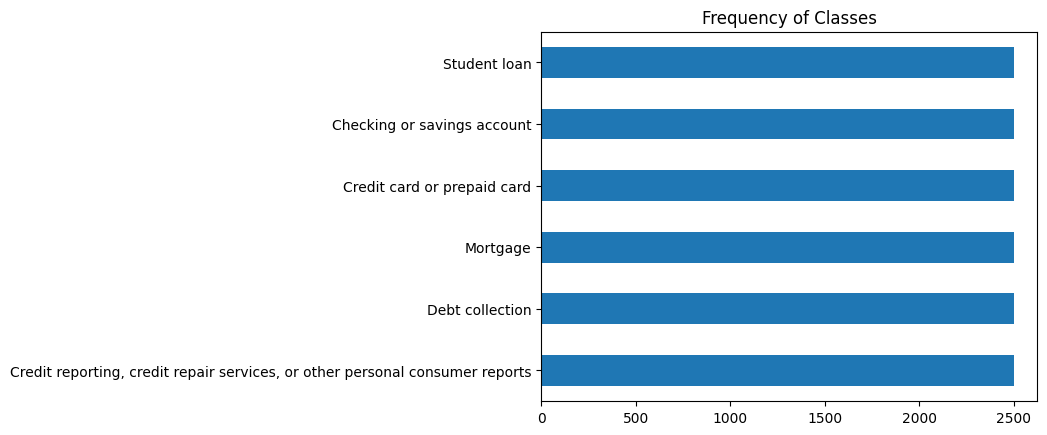

In [ ]:
import matplotlib.pyplot as plt
new_df["Product"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

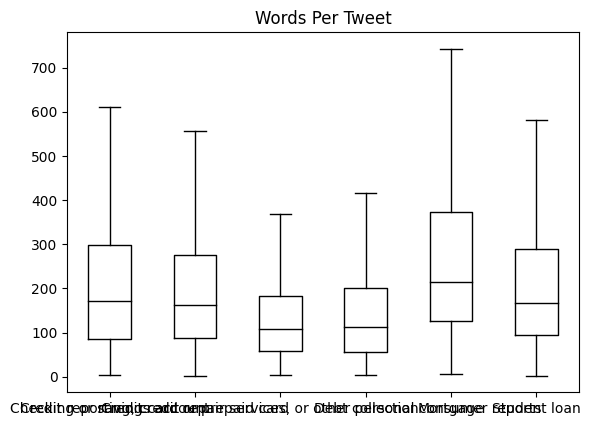

In [ ]:
new_df["Words Per Tweet"] = new_df["Consumer complaint narrative"].str.split().apply(len)
new_df.boxplot("Words Per Tweet", by="Product", grid=False,
 showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()


In [ ]:
new_df.to_csv('complaints.csv')

In [ ]:
df = pd.read_csv(current_path+"\complaints.csv")
df

,Unnamed: 0,Product,Consumer complaint narrative,label,Words Per Tweet
0,1353571,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...,2,70
1,2130863,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...,2,84
2,2201555,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I...",2,147
3,1280380,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...,2,80
4,1896136,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...,2,151
...,...,...,...,...,...
14995,2903909,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...,5,265
14996,2873541,Student loan,Defaulted on my loans from the original compan...,5,73
14997,1139054,Student loan,"On XX/XX/2019, I learned that my last 3 studen...",5,345
14998,1271284,Student loan,I initially had my student loans with XXXX XXX...,5,262


In [4]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=114eddb373b7546af71da82fcdef2bde7dd8cf52619fe85844c2e7a96131c0cb
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [5]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [6]:
# Function to get sentence embeddings
def get_sentence_embeddings(sentences):
    embeddings = model.encode(sentences)
    return embeddings

# Apply SBERT embeddings
embeddings = get_sentence_embeddings(df['Consumer complaint narrative'])

In [7]:
embeddings.shape

(15000, 384)

In [8]:
embed_df = pd.DataFrame(embeddings)

In [9]:
embed_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.007053,0.036896,-0.062162,0.060747,-0.031190,-0.014175,-0.011366,-0.029301,-0.003502,-0.050387,...,-0.012625,0.045488,-0.023349,-0.052337,-0.004978,-0.029252,0.038641,-0.013225,-0.040087,-0.038630
1,-0.085500,0.052140,0.039261,-0.001716,0.040331,-0.026381,0.103406,-0.072089,0.031275,-0.102059,...,-0.017513,-0.081585,0.010017,-0.034817,-0.050657,0.095110,0.122888,-0.089320,-0.009627,-0.088591
2,-0.050837,0.005724,-0.080007,0.058624,-0.007886,0.040834,-0.050472,-0.015521,0.078216,-0.039137,...,0.018554,0.048791,0.008269,0.004522,0.005217,-0.028298,-0.053705,-0.060150,0.019633,-0.010169
3,-0.053147,0.102170,-0.074636,0.022305,0.045990,0.059465,0.075001,-0.039779,0.005551,-0.002273,...,-0.070663,0.023399,0.072031,-0.046540,-0.027904,-0.078049,0.071070,0.012554,0.014090,-0.069644
4,-0.108770,0.026251,-0.059413,0.035813,0.009491,0.000758,0.003904,-0.032836,0.036338,-0.014287,...,-0.012432,0.028561,0.012228,-0.051305,-0.086661,-0.041804,0.149977,-0.040714,-0.023308,-0.023216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.048272,0.036304,0.019112,-0.052642,-0.022701,-0.008826,0.012553,0.016953,-0.049602,-0.008039,...,-0.035893,-0.040127,-0.011389,0.059600,0.008215,-0.007710,0.041259,-0.036302,-0.068583,-0.051928
14996,-0.046041,-0.014821,0.012117,0.012679,-0.023543,-0.064916,-0.053447,-0.035481,0.034959,-0.076930,...,-0.017366,-0.080873,-0.022009,0.087139,-0.086958,-0.021444,0.061660,-0.061075,-0.067232,-0.014881
14997,-0.049317,0.032106,0.039317,-0.035726,-0.000904,-0.073671,-0.007098,-0.015332,0.057714,0.023513,...,0.046530,-0.142187,-0.033602,0.032381,-0.036337,0.001758,0.009410,-0.047653,-0.031852,-0.069767
14998,-0.064613,0.064325,0.073982,-0.043781,0.040896,-0.033474,-0.018265,-0.018835,0.015461,-0.019160,...,0.041159,-0.107610,-0.006334,0.010147,-0.018558,0.003787,0.070301,-0.062143,-0.043200,-0.113735


In [10]:
df

,Unnamed: 0,Product,Consumer complaint narrative,label,Words Per Tweet
0,1353571,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX. I pulled my credit repor...,2,70
1,2130863,"Credit reporting, credit repair services, or o...",I am becoming more and more frustrated I have ...,2,84
2,2201555,"Credit reporting, credit repair services, or o...","After purchasing a copy of my credit report, I...",2,147
3,1280380,"Credit reporting, credit repair services, or o...",I am writing to delete the following informati...,2,80
4,1896136,"Credit reporting, credit repair services, or o...",I submitted a dispute on a collection account ...,2,151
...,...,...,...,...,...
14995,2903909,Student loan,I have dealt with Navient ( and XXXX XXXX ) si...,5,265
14996,2873541,Student loan,Defaulted on my loans from the original compan...,5,73
14997,1139054,Student loan,"On XX/XX/2019, I learned that my last 3 studen...",5,345
14998,1271284,Student loan,I initially had my student loans with XXXX XXX...,5,262


In [11]:
embed_df["Consumer complaint narrative"] = df["Consumer complaint narrative"]

In [12]:
embed_df["Product"] = df["Product"]

In [13]:
embed_df["label"] = df["label"]

In [14]:
embed_df

,0,1,2,3,4,5,6,7,8,9,...,377,378,379,380,381,382,383,Consumer complaint narrative,Product,label
0,-0.007053,0.036896,-0.062162,0.060747,-0.031190,-0.014175,-0.011366,-0.029301,-0.003502,-0.050387,...,-0.052337,-0.004978,-0.029252,0.038641,-0.013225,-0.040087,-0.038630,My name is XXXX XXXX. I pulled my credit repor...,"Credit reporting, credit repair services, or o...",2
1,-0.085500,0.052140,0.039261,-0.001716,0.040331,-0.026381,0.103406,-0.072089,0.031275,-0.102059,...,-0.034817,-0.050657,0.095110,0.122888,-0.089320,-0.009627,-0.088591,I am becoming more and more frustrated I have ...,"Credit reporting, credit repair services, or o...",2
2,-0.050837,0.005724,-0.080007,0.058624,-0.007886,0.040834,-0.050472,-0.015521,0.078216,-0.039137,...,0.004522,0.005217,-0.028298,-0.053705,-0.060150,0.019633,-0.010169,"After purchasing a copy of my credit report, I...","Credit reporting, credit repair services, or o...",2
3,-0.053147,0.102170,-0.074636,0.022305,0.045990,0.059465,0.075001,-0.039779,0.005551,-0.002273,...,-0.046540,-0.027904,-0.078049,0.071070,0.012554,0.014090,-0.069644,I am writing to delete the following informati...,"Credit reporting, credit repair services, or o...",2
4,-0.108770,0.026251,-0.059413,0.035813,0.009491,0.000758,0.003904,-0.032836,0.036338,-0.014287,...,-0.051305,-0.086661,-0.041804,0.149977,-0.040714,-0.023308,-0.023216,I submitted a dispute on a collection account ...,"Credit reporting, credit repair services, or o...",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,-0.048272,0.036304,0.019112,-0.052642,-0.022701,-0.008826,0.012553,0.016953,-0.049602,-0.008039,...,0.059600,0.008215,-0.007710,0.041259,-0.036302,-0.068583,-0.051928,I have dealt with Navient ( and XXXX XXXX ) si...,Student loan,5
14996,-0.046041,-0.014821,0.012117,0.012679,-0.023543,-0.064916,-0.053447,-0.035481,0.034959,-0.076930,...,0.087139,-0.086958,-0.021444,0.061660,-0.061075,-0.067232,-0.014881,Defaulted on my loans from the original compan...,Student loan,5
14997,-0.049317,0.032106,0.039317,-0.035726,-0.000904,-0.073671,-0.007098,-0.015332,0.057714,0.023513,...,0.032381,-0.036337,0.001758,0.009410,-0.047653,-0.031852,-0.069767,"On XX/XX/2019, I learned that my last 3 studen...",Student loan,5
14998,-0.064613,0.064325,0.073982,-0.043781,0.040896,-0.033474,-0.018265,-0.018835,0.015461,-0.019160,...,0.010147,-0.018558,0.003787,0.070301,-0.062143,-0.043200,-0.113735,I initially had my student loans with XXXX XXX...,Student loan,5


In [15]:
embed_df.to_csv('complaints.csv')

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
emotions.reset_format()

In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Loading cached processed dataset at C:\Users\janhvi\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-0ee3ba257de5a594.arrow
Loading cached processed dataset at C:\Users\janhvi\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-ca4517c4d1294095.arrow
Loading cached processed dataset at C:\Users\janhvi\.cache\huggingface\datasets\emotion\split\1.0.0\cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd\cache-ac3f25f78bf652e1.arrow


In [ ]:
#hide_input
tokens2ids = list(zip(tokenizer.all_special_tokens, tokenizer.all_special_ids))
data = sorted(tokens2ids, key=lambda x : x[-1])
df = pd.DataFrame(data, columns=["Special Token", "Special Token ID"])
df.T

,0,1,2,3,4
Special Token,[PAD],[UNK],[CLS],[SEP],[MASK]
Special Token ID,0,100,101,102,103


In [ ]:

import torch
import torch.nn.functional as F

In [ ]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
emotions_encoded.set_format("torch", columns=["input_ids", "attention_mask", "label"])

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_state'],
        num_rows: 2000
    })
})

In [ ]:
import os
current_path = os.getcwd()

In [ ]:
emotions_hidden.save_to_disk(current_path+"/dataset/wo_finetune2")

Saving the dataset (0/1 shards):   0%|          | 0/16000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,4.044755,6.169471,0
1,-3.292837,4.886305,0
2,5.394529,2.912648,3
3,-2.400421,2.818575,2
4,-3.224510,2.796720,3


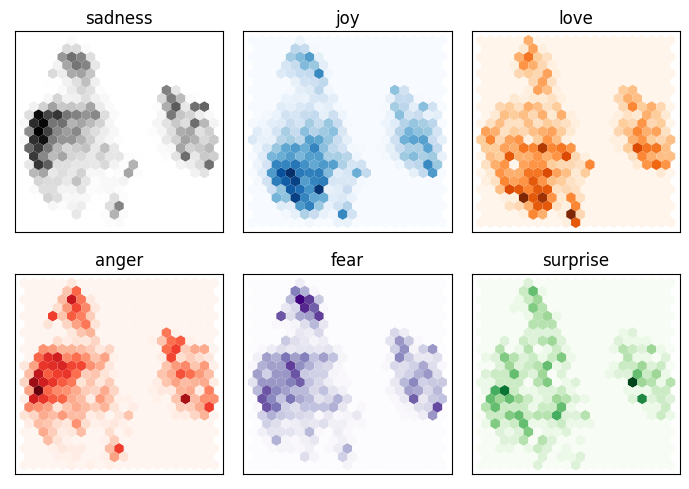

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [ ]:
# hide_output
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.weight', 'vocab_projector.weight', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [ ]:
!huggingface-cli login

^C


In [ ]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train();

OSError: Token is required (`use_auth_token=True`), but no token found. You need to provide a token or be logged in to Hugging Face with `huggingface-cli login` or `notebook_login`. See https://huggingface.co/settings/tokens.